**<h1 style="color:Crimson;"> Importing Libraries <h1>**

In [228]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

**<h1 style="color:Crimson;"> Project Name: <h1>**
**<h1 style="color:Gainsboro;"> Zepto Inventory EDA Analysis <h1>**


In [229]:
import pandas as pd

path = r"c:\Users\user\Desktop\Kaggle Datasets\zepto_v2.csv"

# Try with encoding fallback and error handling
try:
    df = pd.read_csv(path, encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(path, encoding="ISO-8859-1")
except FileNotFoundError:
    print("File not found. Check the path and filename.")
except Exception as e:
    print("Some other error occurred:", e)
else:
    print("CSV loaded successfully!")
    print(df.head())


**<h1 style="color:Crimson;"> Data Info <h1>**

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                3732 non-null   object
 1   name                    3732 non-null   object
 2   mrp                     3732 non-null   int64 
 3   discountPercent         3732 non-null   int64 
 4   availableQuantity       3732 non-null   int64 
 5   discountedSellingPrice  3732 non-null   int64 
 6   weightInGms             3732 non-null   int64 
 7   outOfStock              3732 non-null   bool  
 8   quantity                3732 non-null   int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 237.0+ KB


In [231]:
df.shape

(3732, 9)

**<h1 style="color:Crimson;"> Data Handling & Cleaning <h1>**

In [232]:
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

**<h1 style="color:Crimson;"> EDA & Visualization <h1>**

In [233]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


**<h1 style="color:Crimson;"> Items That Are Out Of Stock<h1>**

In [234]:
Out_of_stock_items=df[df["outOfStock"]==True]
Out_of_stock_items[["name","quantity"]].sort_values(["quantity"],ascending=True)


,name,quantity
606,Everest Saffron Kesar,0
1120,Everest Saffron Kesar,0
3626,Chakaachak Eazo Grass Broom New,1
3623,Chakaachak Super Steel Scrubber,1
582,Daawat Super Basmati Rice,1
...,...,...
3420,Dettol Original Liquid Handwash Refill,750
3629,Comfort After Wash Fabric Conditioner Lily Fresh,860
1753,Del Monte Original Blend Tomato Ketchup Pouch,950
2141,Del Monte Original Blend Tomato Ketchup Pouch,950


C:\Users\user\AppData\Local\Temp\ipykernel_3200\3257276969.py:7: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


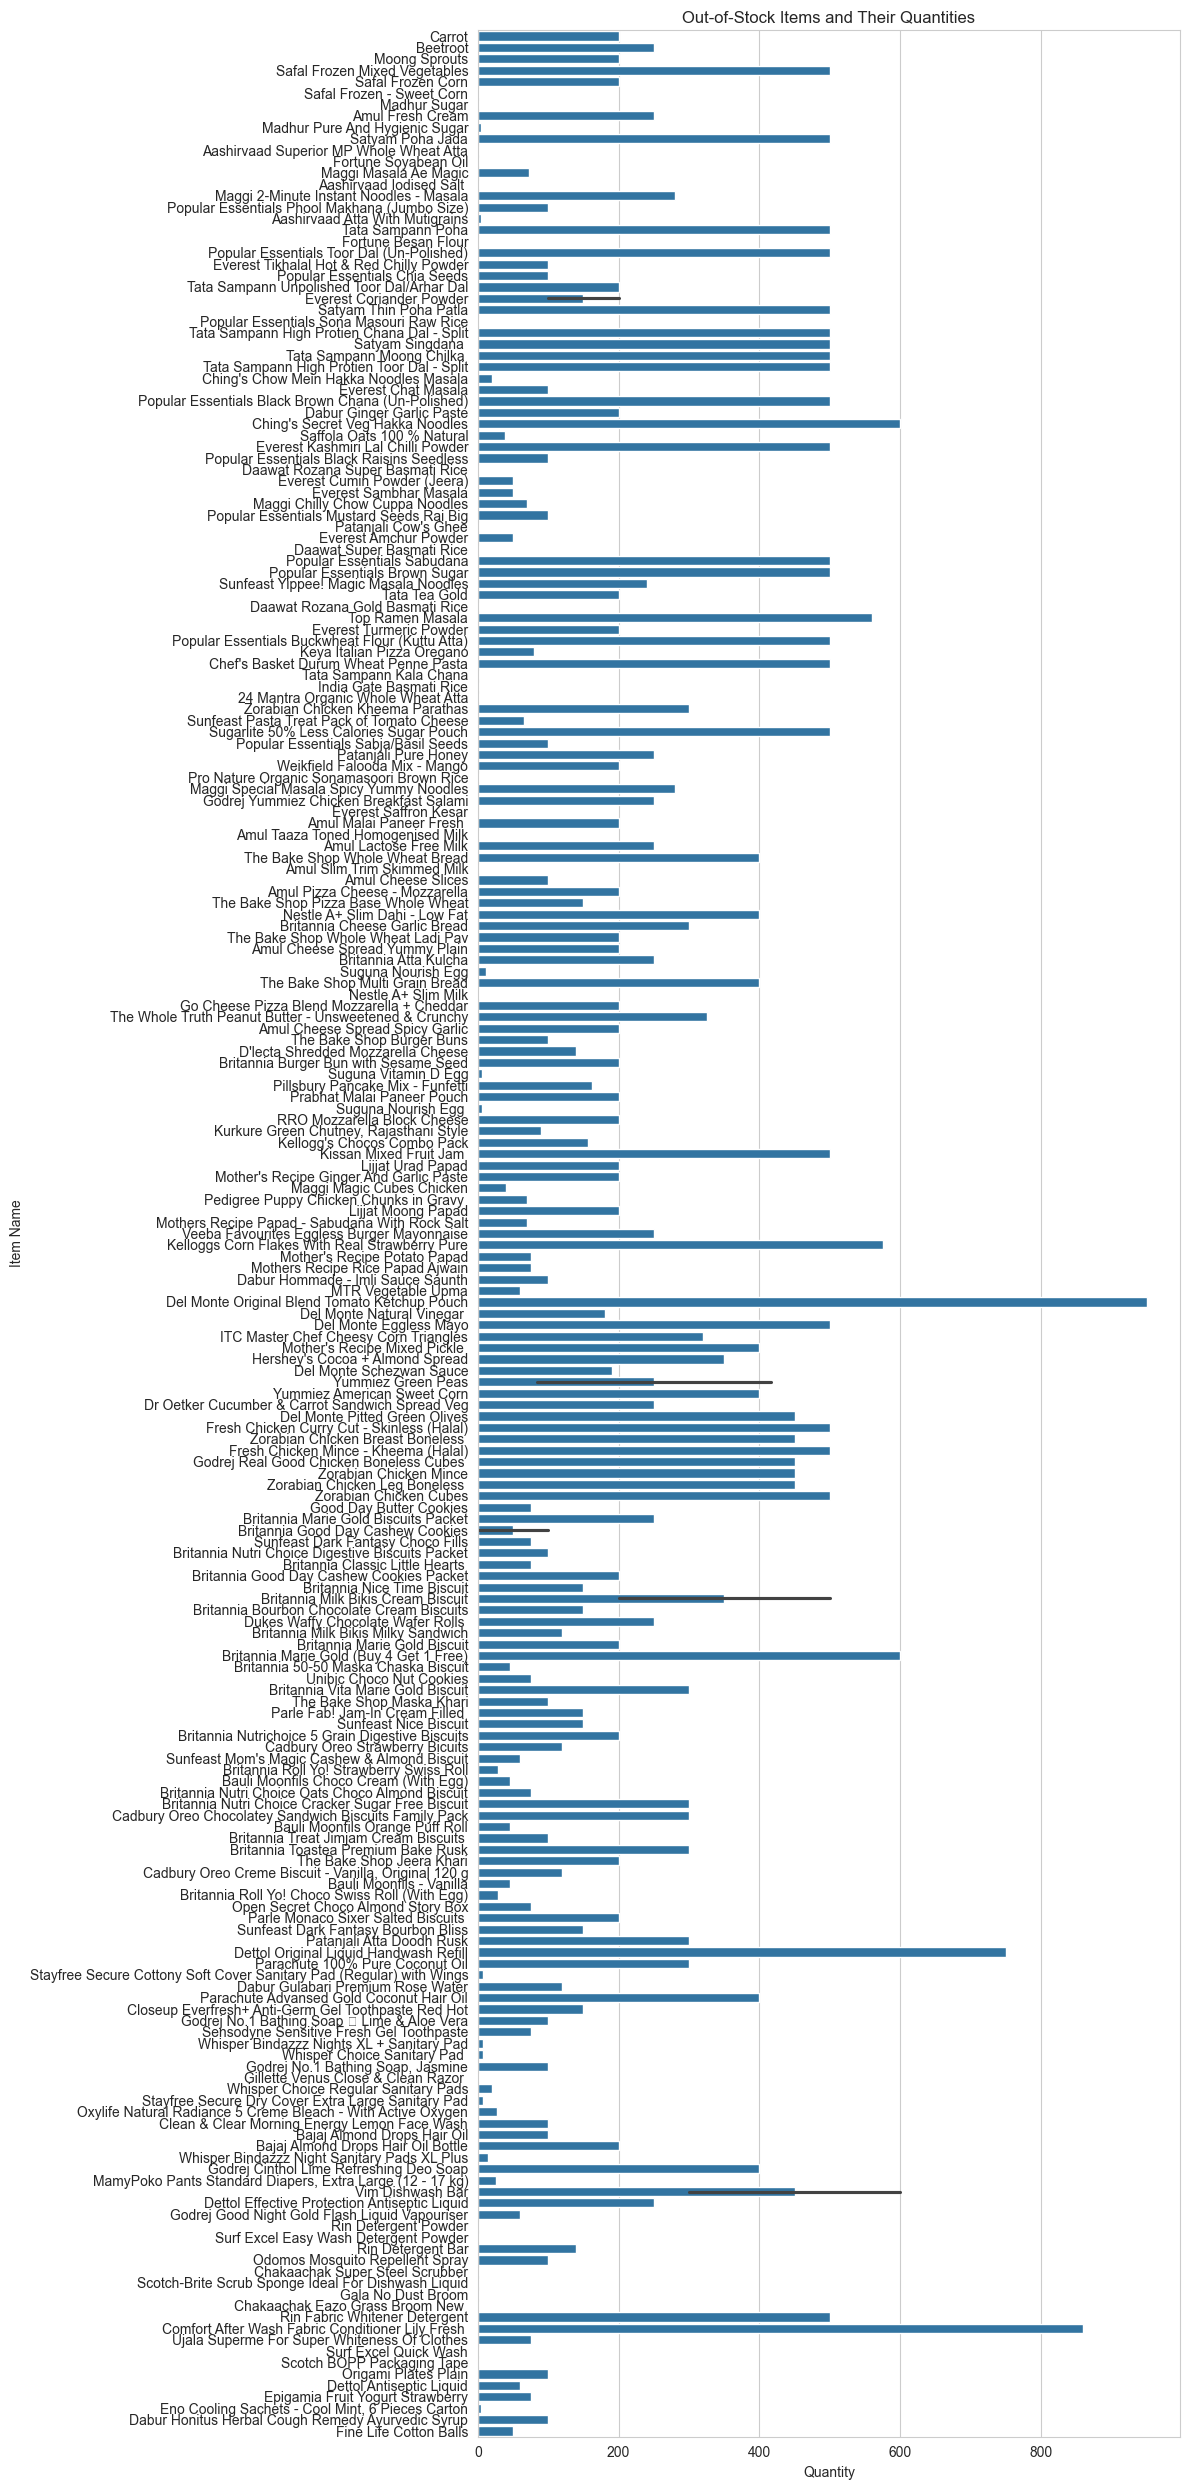

In [235]:
plt.figure(figsize=(12, 25))  # Tall figure
sns.barplot(data=Out_of_stock_items, y="name", x="quantity", dodge=False)

plt.title("Out-of-Stock Items and Their Quantities")
plt.xlabel("Quantity")
plt.ylabel("Item Name")
plt.tight_layout()
plt.show()


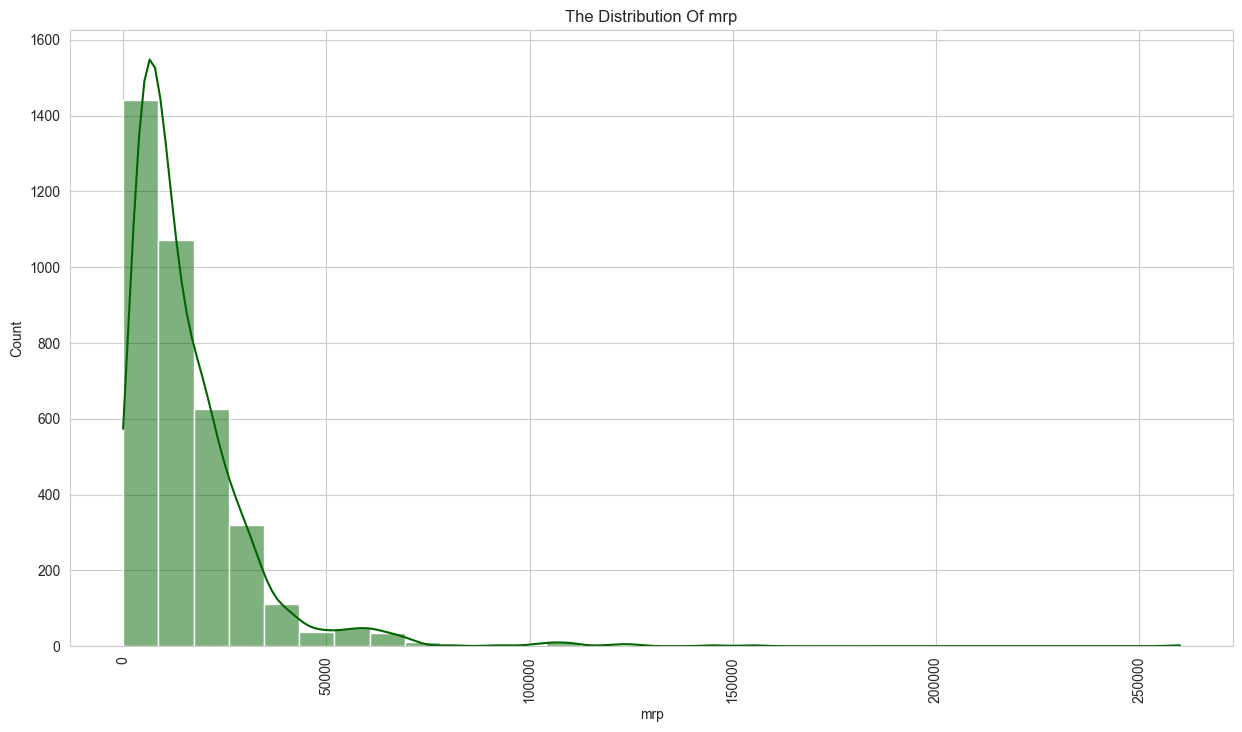

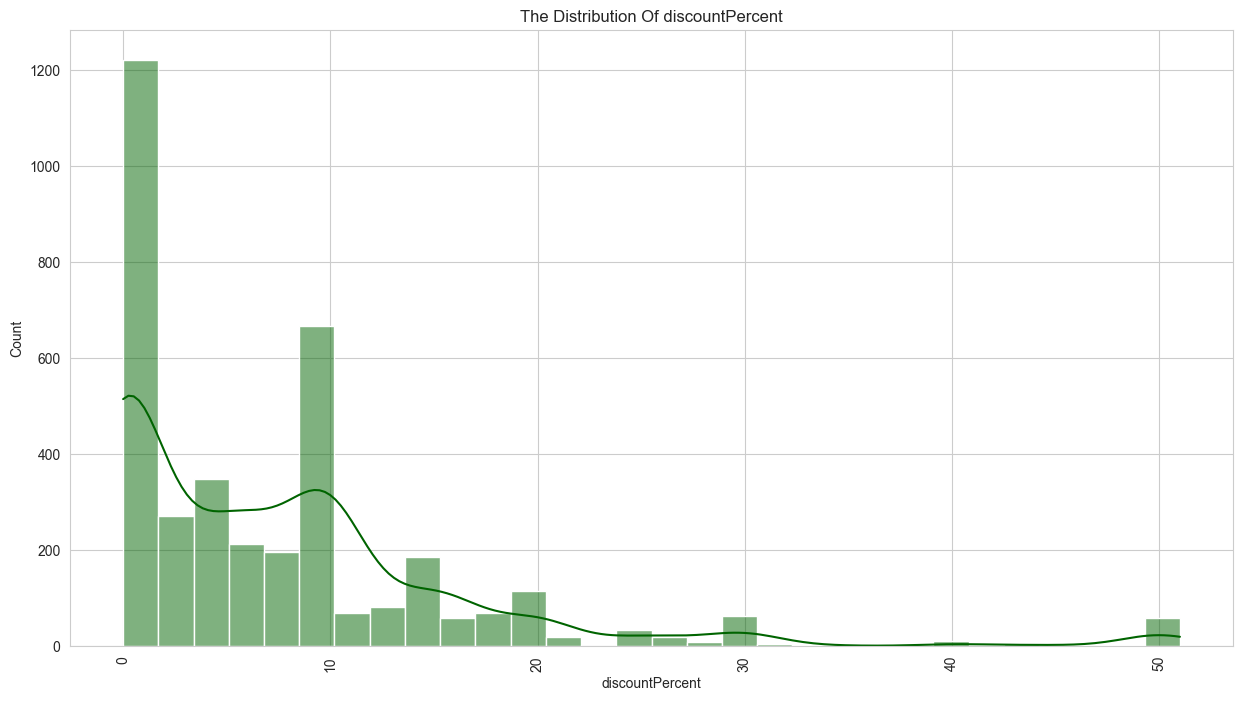

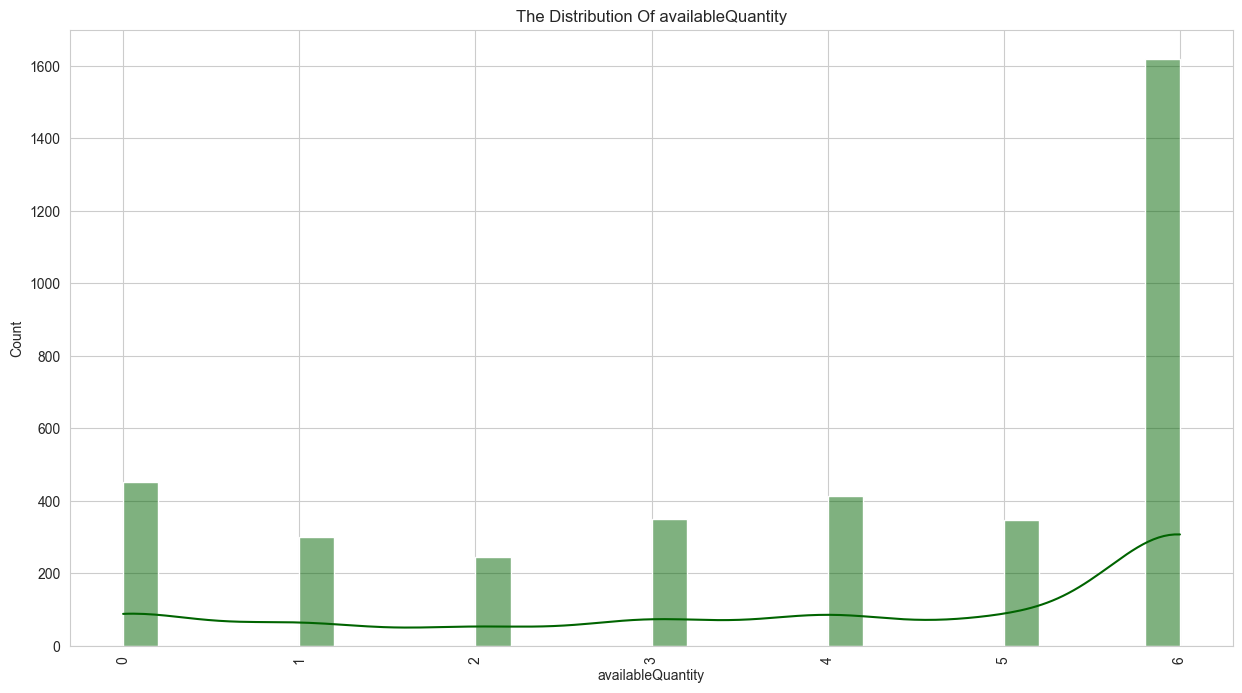

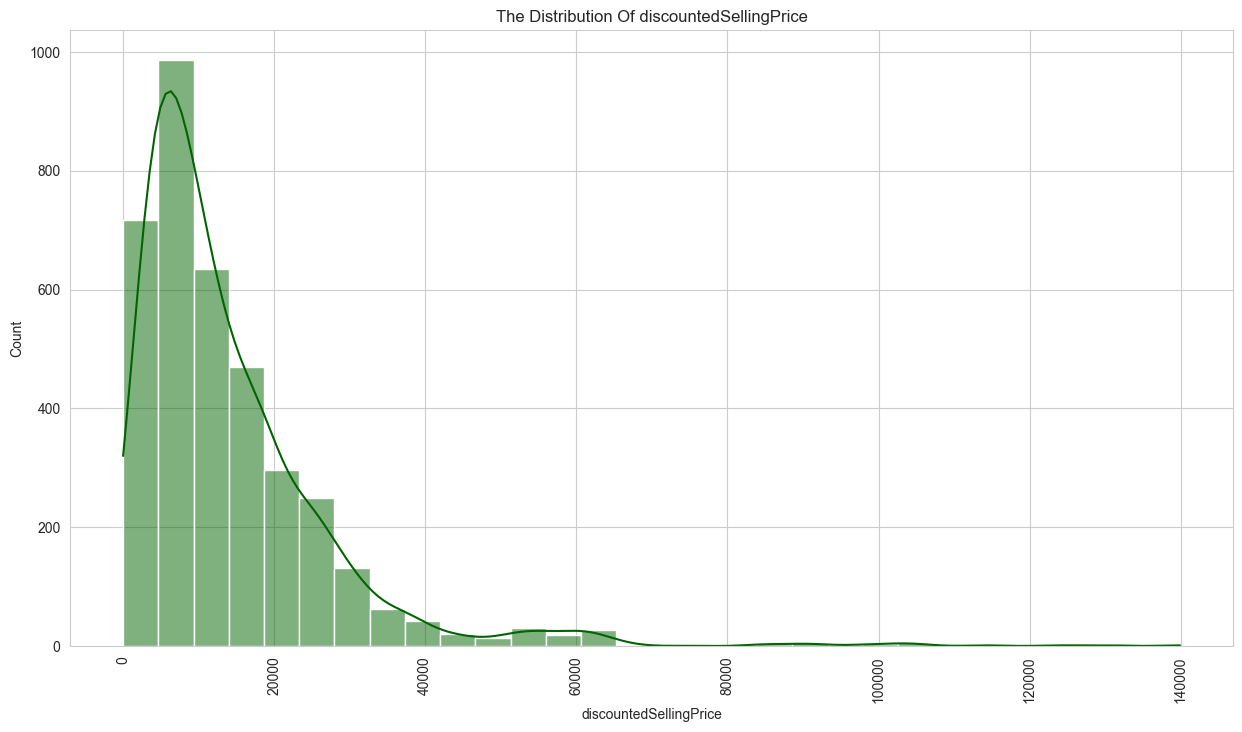

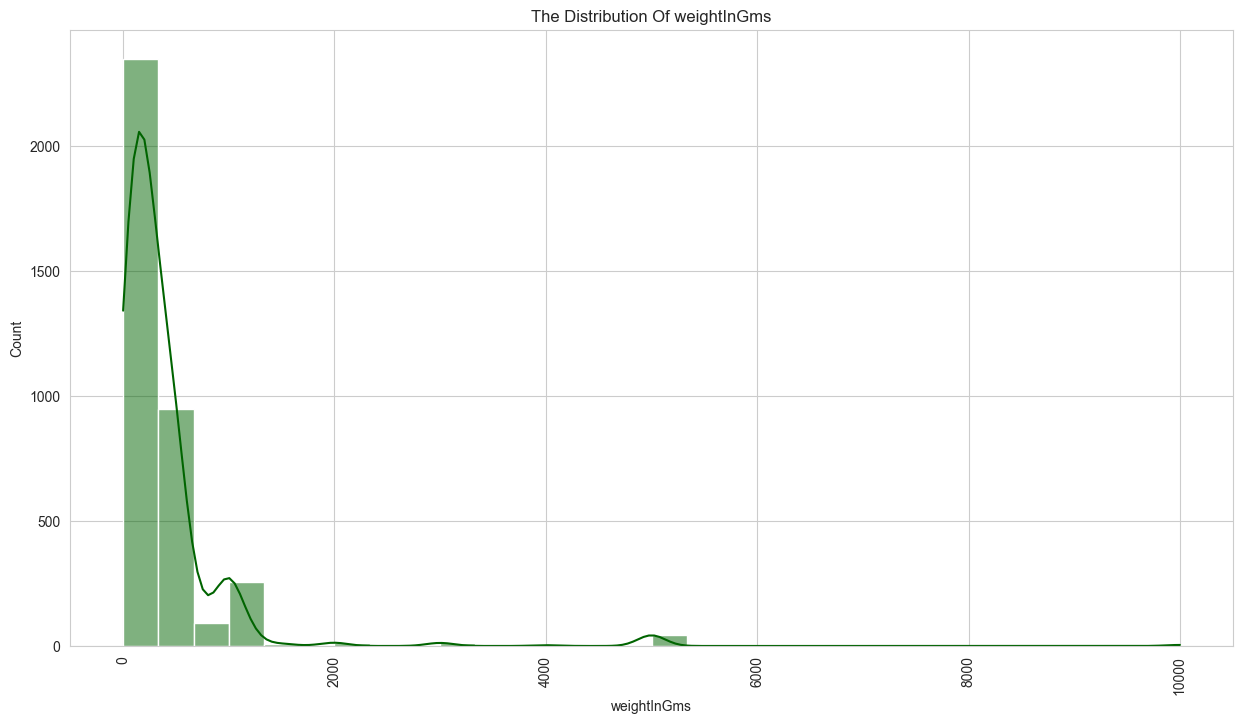

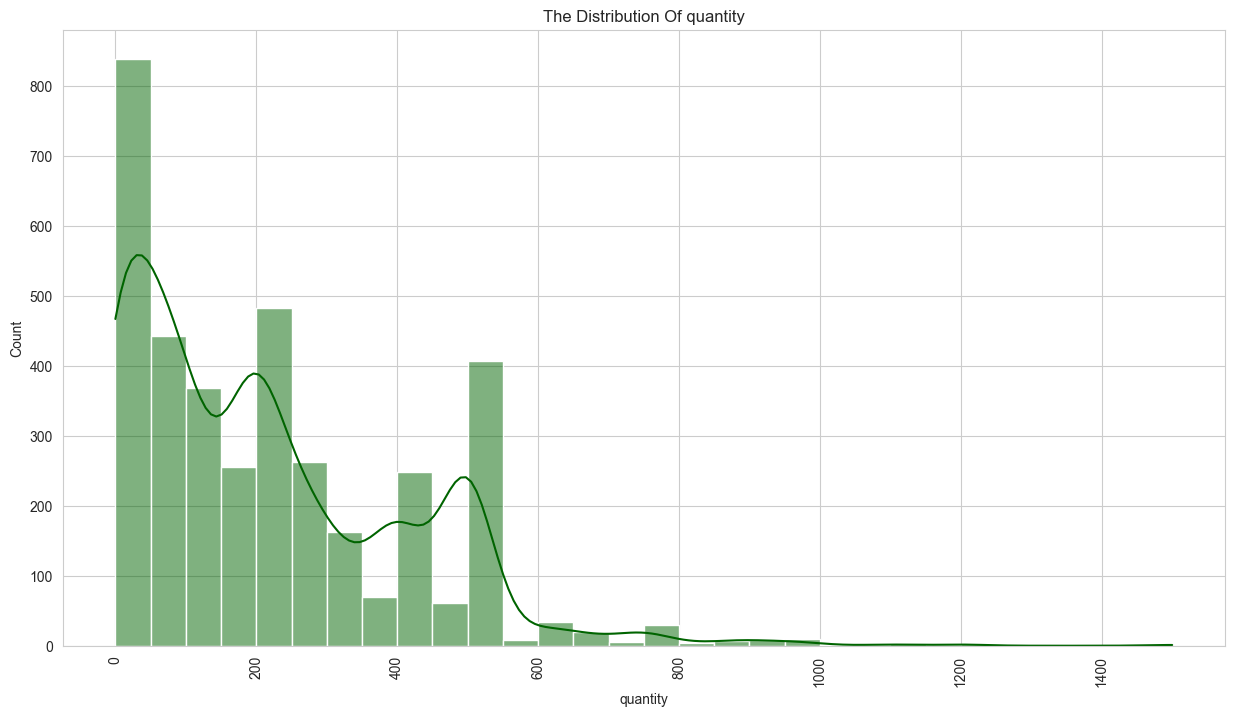

In [236]:
d=df.select_dtypes(include="number")
for col in d:
    plt.figure(figsize=(15,8))
    sns.histplot(data=d,x=col,kde=True,bins=30,color="darkgreen")
    plt.title(f"The Distribution Of {col}")
    plt.xticks(rotation=90)
    plt.show()

 **<h1 style="color:Crimson;"> Highest Discounted Price Item <h1>**

In [237]:
Top_dicount_percentage=df.sort_values(["discountPercent"],ascending=False)
Top_dicount_percentage[["Category","name","mrp","discountPercent","discountedSellingPrice"]]

,Category,name,mrp,discountPercent,discountedSellingPrice
2619,Biscuits,Dukes Waffy Strawberry Wafers,4500,51,2200
2615,Biscuits,Dukes Waffy Orange Wafers,4500,51,2200
2608,Biscuits,Dukes Waffy Chocolate Wafers,4500,51,2200
1174,"Dairy, Bread & Batter",RRO Sour Cream,27500,50,13700
792,Munchies,Ceres Foods Fish Mustard Instant Liquid Masala,22000,50,11000
...,...,...,...,...,...
3670,Health & Hygiene,Eno Regular Fruit Salt Energy Powder,13000,0,13000
3638,Health & Hygiene,Dettol Original Germ Protection Alcohol Based ...,2500,0,2500
726,Munchies,Popular Essentials Mustard Seeds Rai Small,2000,0,2000
2214,Chocolates & Candies,Borges Durum Wheat Fusilli Pasta,25000,0,25000


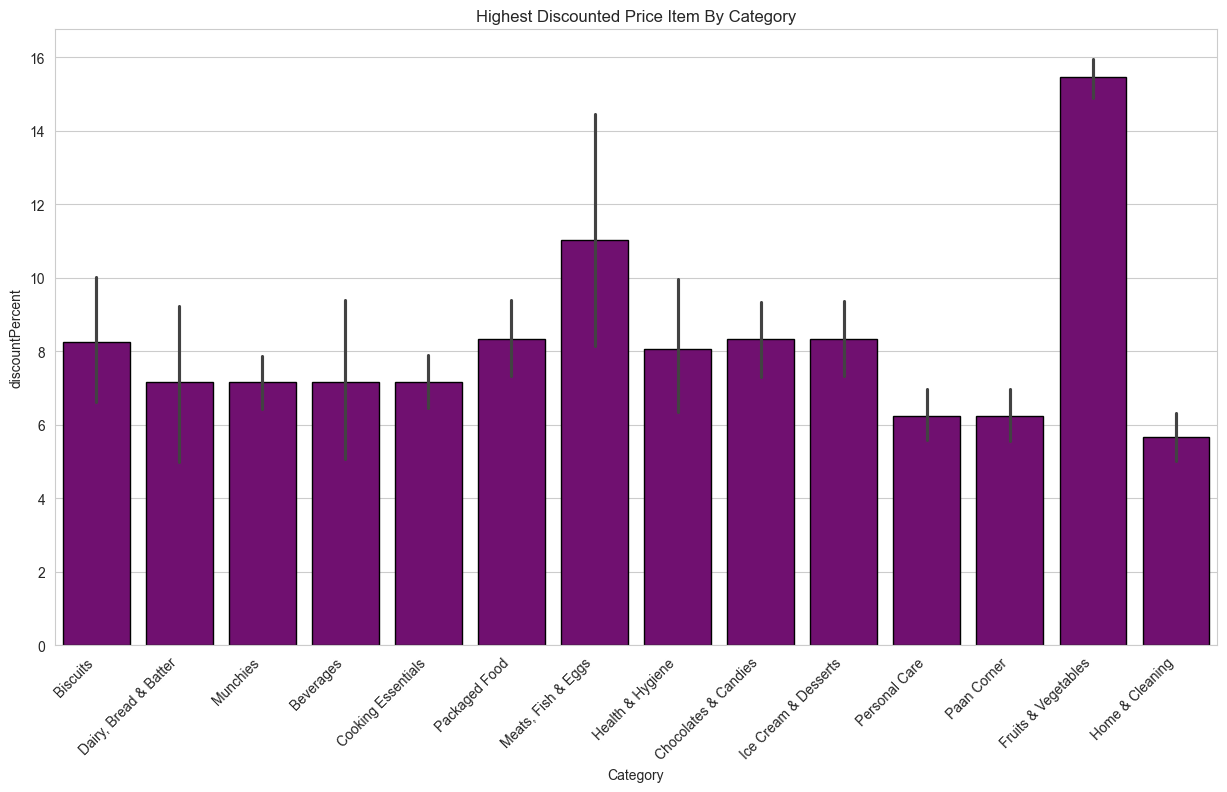

In [238]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.barplot(data=Top_dicount_percentage,x="Category",y="discountPercent",color="purple",edgecolor="black")
plt.title("Highest Discounted Price Item By Category")
plt.xticks(rotation=45,ha="right")
plt.show()

In [239]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


**<h1 style="color:Crimson;"> Quantity Listing <h1>**

In [240]:
classifi_qua=df.sort_values(["quantity"],ascending=True)
classifi_qua[["Category","quantity","availableQuantity"]]

,Category,quantity,availableQuantity
606,Cooking Essentials,0,0
3273,Paan Corner,0,3
3184,Paan Corner,0,2
2929,Personal Care,0,3
2840,Personal Care,0,2
...,...,...,...
1932,Ice Cream & Desserts,1200,6
2320,Chocolates & Candies,1200,6
1544,Packaged Food,1200,6
3161,Paan Corner,1500,6


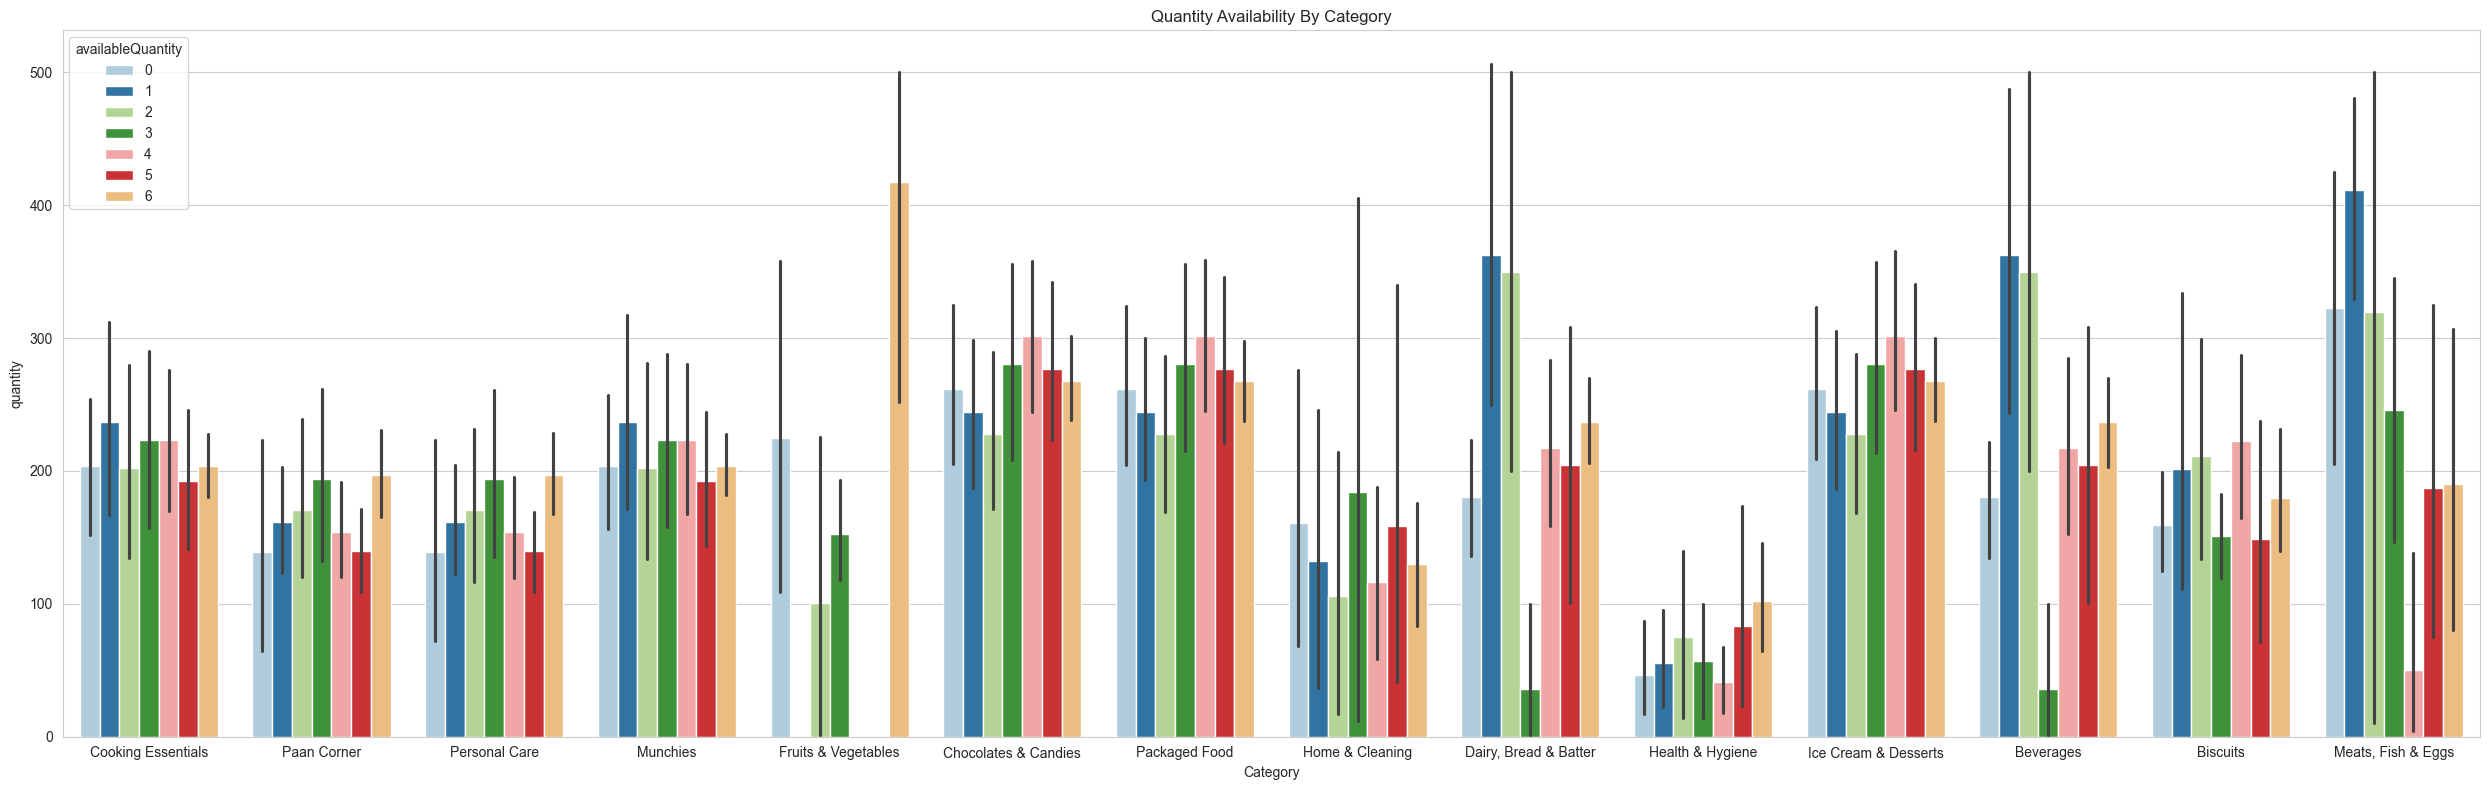

In [241]:
plt.figure(figsize=(25,8))
sns.set_style("whitegrid")
sns.barplot(data=classifi_qua,x="Category",y="quantity",hue="availableQuantity",palette="Paired")
plt.title("Quantity Availability By Category")
plt.tight_layout()
plt.show()

 **<h1 style="color:Crimson;"> Correlation Heatmap <h1>**

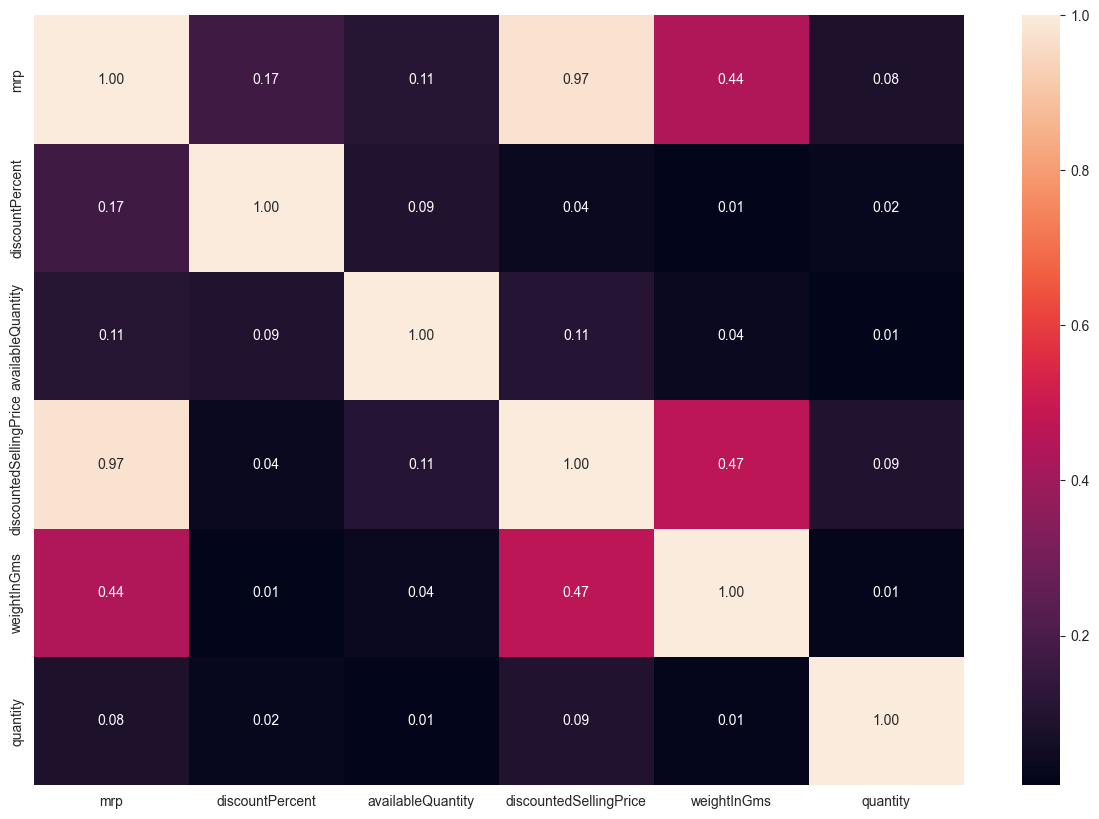

In [242]:
plt.figure(figsize=(15,10))
corr_m=df.select_dtypes(include="number").corr()
sns.heatmap(data=corr_m,annot=True,fmt=".2f")
plt.show()